Как можно улучшить модель предсказания цены?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.6 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import pandas as pd
file_path = '/content/drive/MyDrive/iTask/data_task.csv'
df = pd.read_csv(file_path)
print(f'count rows:{len(df)}')
df

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/iTask/data_task.csv'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   compression-ratio  205 non-null    float64
 2   horsepower         203 non-null    float64
 3   peak-rpm           203 non-null    float64
 4   num-of-doors       203 non-null    object 
 5   num-of-cylinders   205 non-null    object 
 6   body-style         205 non-null    object 
dtypes: float64(4), object(3)
memory usage: 11.3+ KB


In [ ]:
print('count rows:', len(df))
df = df.dropna()
print('count rows:', len(df))

count rows: 205
count rows: 197


In [ ]:
numeric_features = ['price', 'compression-ratio', 'horsepower', 'peak-rpm']
categorical_features = ['num-of-doors', 'num-of-cylinders', 'body-style']

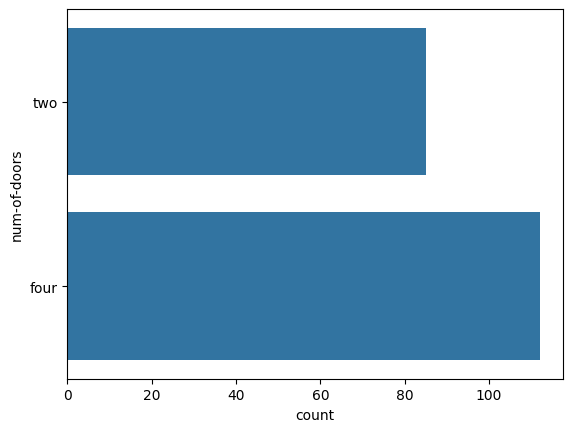

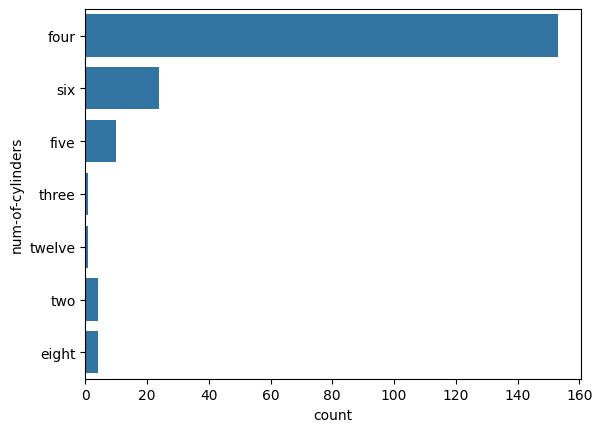

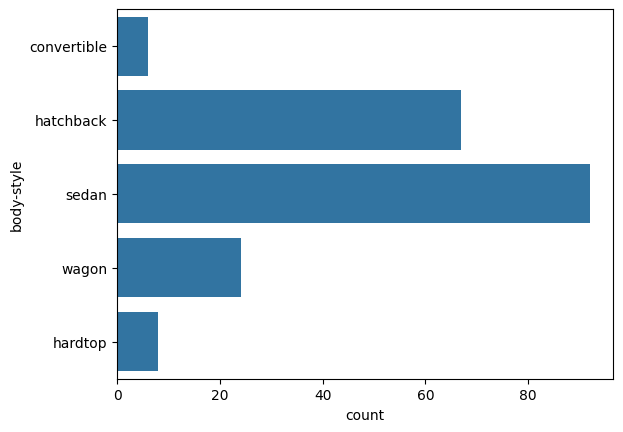

In [ ]:
for cc in categorical_features:
    sns.countplot(y = df[cc])
    plt.show()

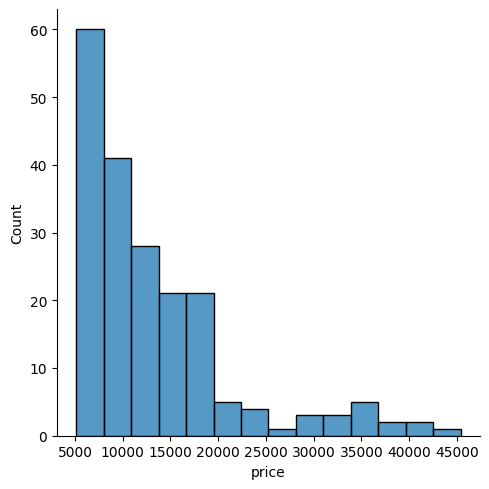

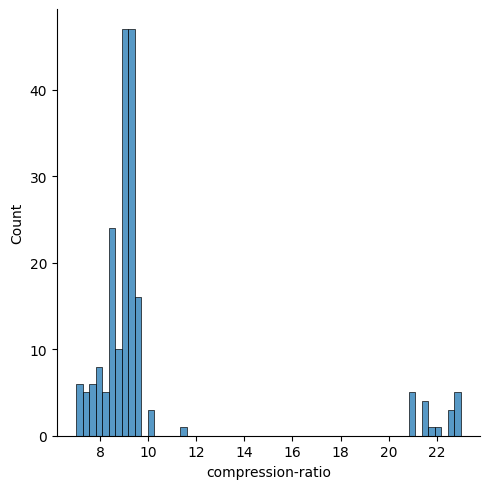

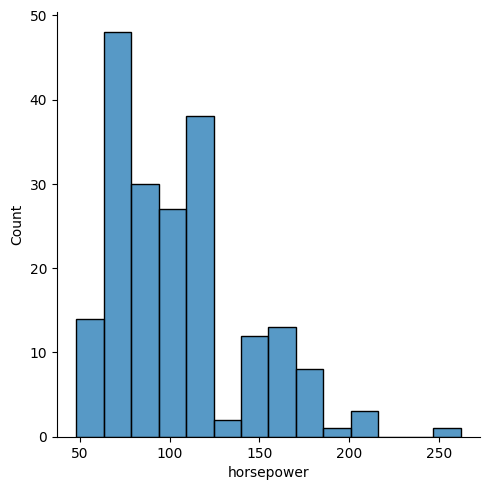

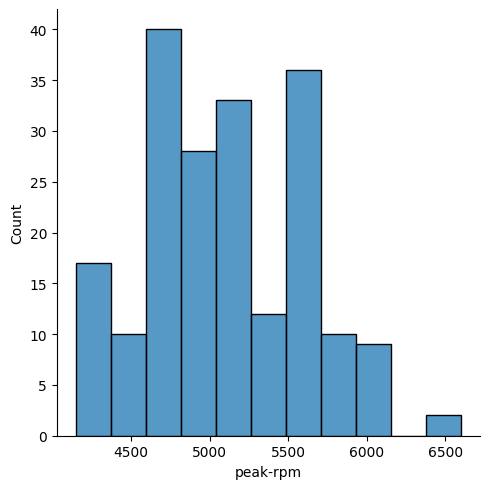

In [ ]:
for nc in numeric_features:
    sns.displot(df[nc])
    plt.show()

In [ ]:
from sklearn import preprocessing

data_num = df[numeric_features]
data_cat = df[categorical_features]
for cat in categorical_features:
    le = preprocessing.LabelEncoder()
    le.fit(df[cat])
    data_cat[cat] = le.transform(df[cat].values)

data_train = pd.concat([data_num, data_cat], axis=1)

<ipython-input-38-acc7b01386ea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat[cat] = le.transform(df[cat].values)
<ipython-input-38-acc7b01386ea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat[cat] = le.transform(df[cat].values)
<ipython-input-38-acc7b01386ea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [ ]:
import catboost
from sklearn.model_selection import train_test_split

In [ ]:
col_pred = 'price'

<ipython-input-41-adffc238eb37>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


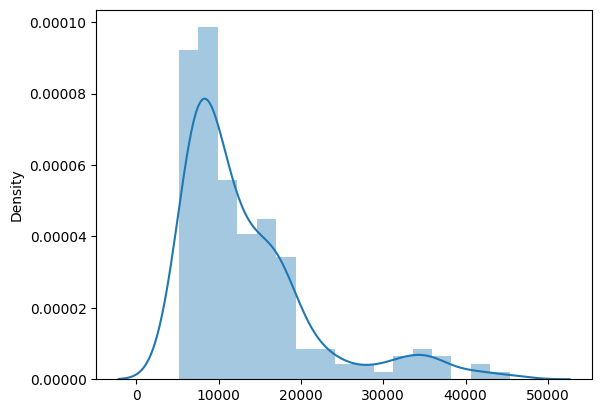

In [ ]:
X = df.dropna()
X = X[[col_pred] + numeric_features + categorical_features]

y = X[col_pred]

sns.distplot(y)
plt.show()

X = X.drop(columns=[col_pred])

<ipython-input-42-45b41faaacb1>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=y_train, ax=ax1, color='g')
<ipython-input-42-45b41faaacb1>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=y_test, ax=ax2, color='g')


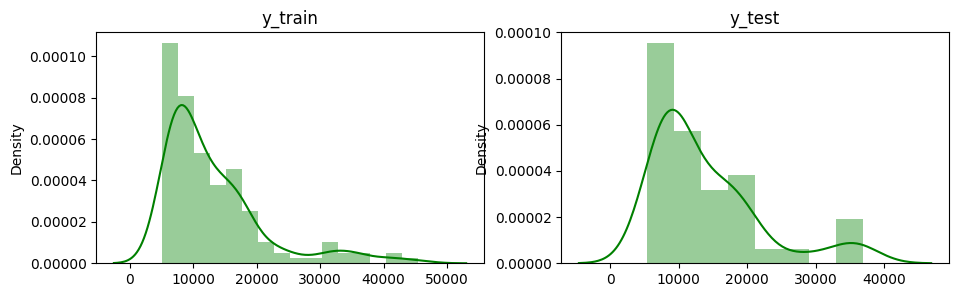

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, )

#preproc_transformer = StandardScaler()
#X_train = preproc_transformer.fit_transform(X_train)
#X_test = preproc_transformer.transform(X_test)


fig, (ax1, ax2)= plt.subplots(nrows=1, ncols=2, figsize=(11,3))

sns.distplot(x=y_train, ax=ax1, color='g')
ax1.set_title('y_train')
sns.distplot(x=y_test, ax=ax2, color='g')
ax2.set_title('y_test')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
%%time
parameters = {
              'iterations'    : [250]}

model = catboost.CatBoostRegressor(logging_level='Silent',
                           cat_features=categorical_features,
                           )

grid = GridSearchCV(estimator=model,
                        param_grid=parameters,
                        cv=5, n_jobs=-1,
                        verbose=False)

grid.fit(X_train, np.array(y_train))
model = grid.best_estimator_
print('best_params:', grid.best_params_)
print('best_score:', grid.best_score_)

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 5873, in fit
    return self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline,
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 2410, in _fit
    self._train(
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 1790, in _train
    self._object._train(train_pool, test_pool, params, allow_clear_pool, init_model._object if init_model else None)
  File "_catboost.pyx", line 5017, in _catboost._CatBoost._train
  File "_catboost.pyx", line 5066, in _catboost._CatBoost._train
_catboost.CatBoostError: catboost/private/libs/target/data_providers.cpp:639: Currently only multi-regression, multilabel and survival objectives work with multidimensional target
